In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
heart_d = pd.read_csv('heart_v2.csv')
heart_d.head(5)

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [3]:
heart_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [4]:
heart_d['heart disease'].value_counts()

heart disease
0    150
1    120
Name: count, dtype: int64

In [5]:
X = heart_d.drop('heart disease', axis = 1)
y = heart_d['heart disease']

### Train test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [7]:
print(X_train.shape, X_test.shape)

(189, 4) (81, 4)


### Building the Decision tree

Will use all default parameters excepth depth

In [8]:
dt = DecisionTreeClassifier(max_depth=3)

In [9]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [10]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [11]:
from IPython.display import Image
import six
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz


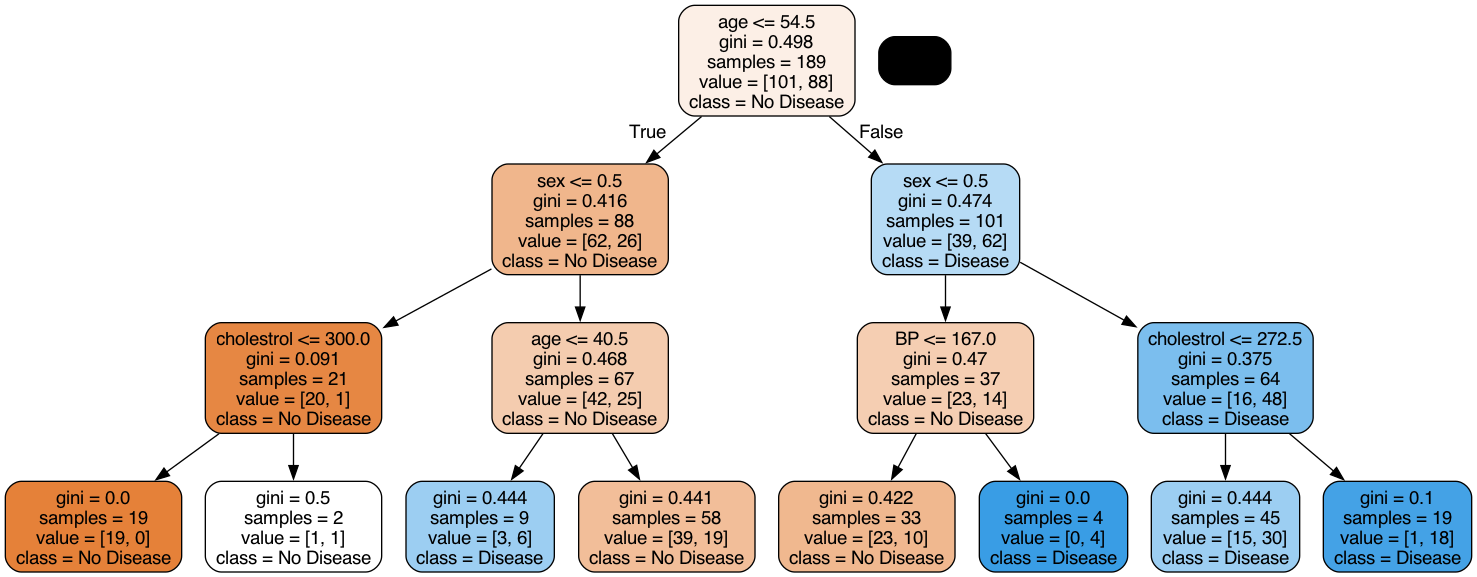

In [12]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns,
                class_names=['No Disease', 'Disease'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Evaluate the model performance on the test set

In [13]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [14]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]])

In [15]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]])

#### Create helper function to test the performance of the classifier

In [16]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()

    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True,
                    feature_names=X.columns,
                    class_names=['No Disease', 'Disease'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    return graph

In [17]:
def evaulate_model(dt_classifier):
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)
    print("Train set performance")
    print(accuracy_score(y_train, y_train_pred))
    print(confusion_matrix(y_train, y_train_pred))
    print("-"*50)
    print("Test set performance")
    print(accuracy_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))

In [18]:
evaulate_model(dt)

Train set performance
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test set performance
0.6049382716049383
[[35 14]
 [18 14]]


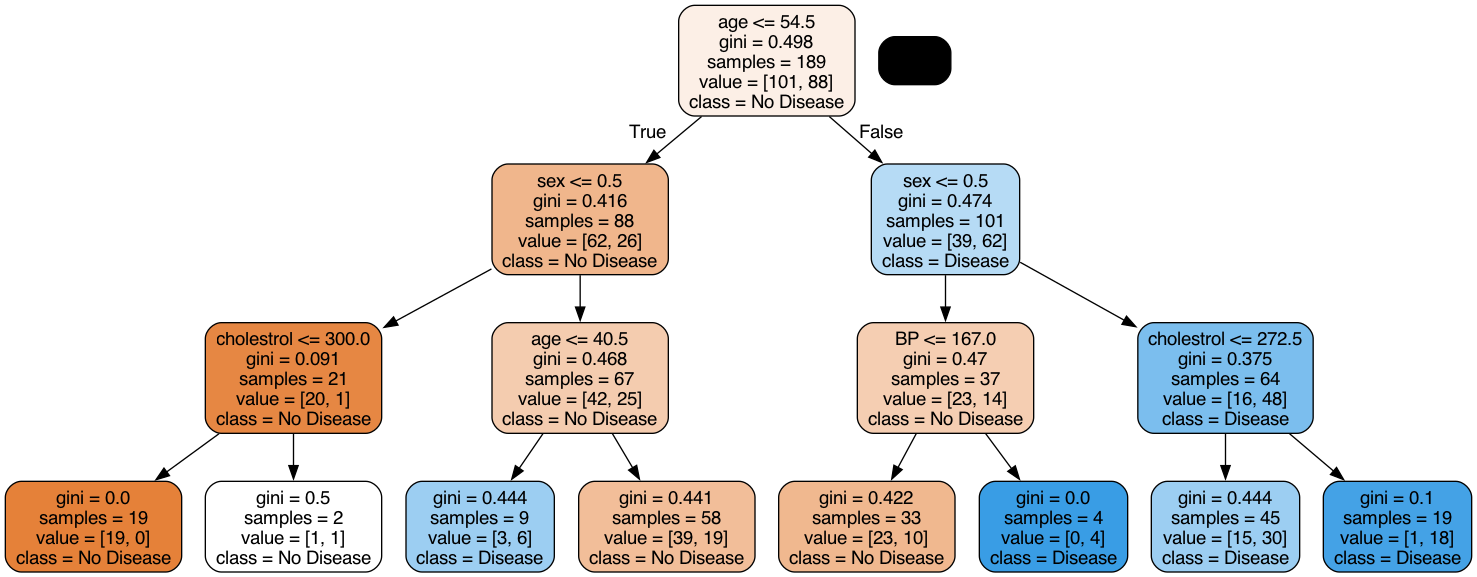

In [19]:
gph = get_dt_graph(dt)
Image(gph.create_png())

#### Decision tree without any hyper-parameter setting

In [20]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
evaulate_model(dt_default)

Train set performance
1.0
[[101   0]
 [  0  88]]
--------------------------------------------------
Test set performance
0.6296296296296297
[[31 18]
 [12 20]]


- Massively overfitting, train set accuracy is 100%

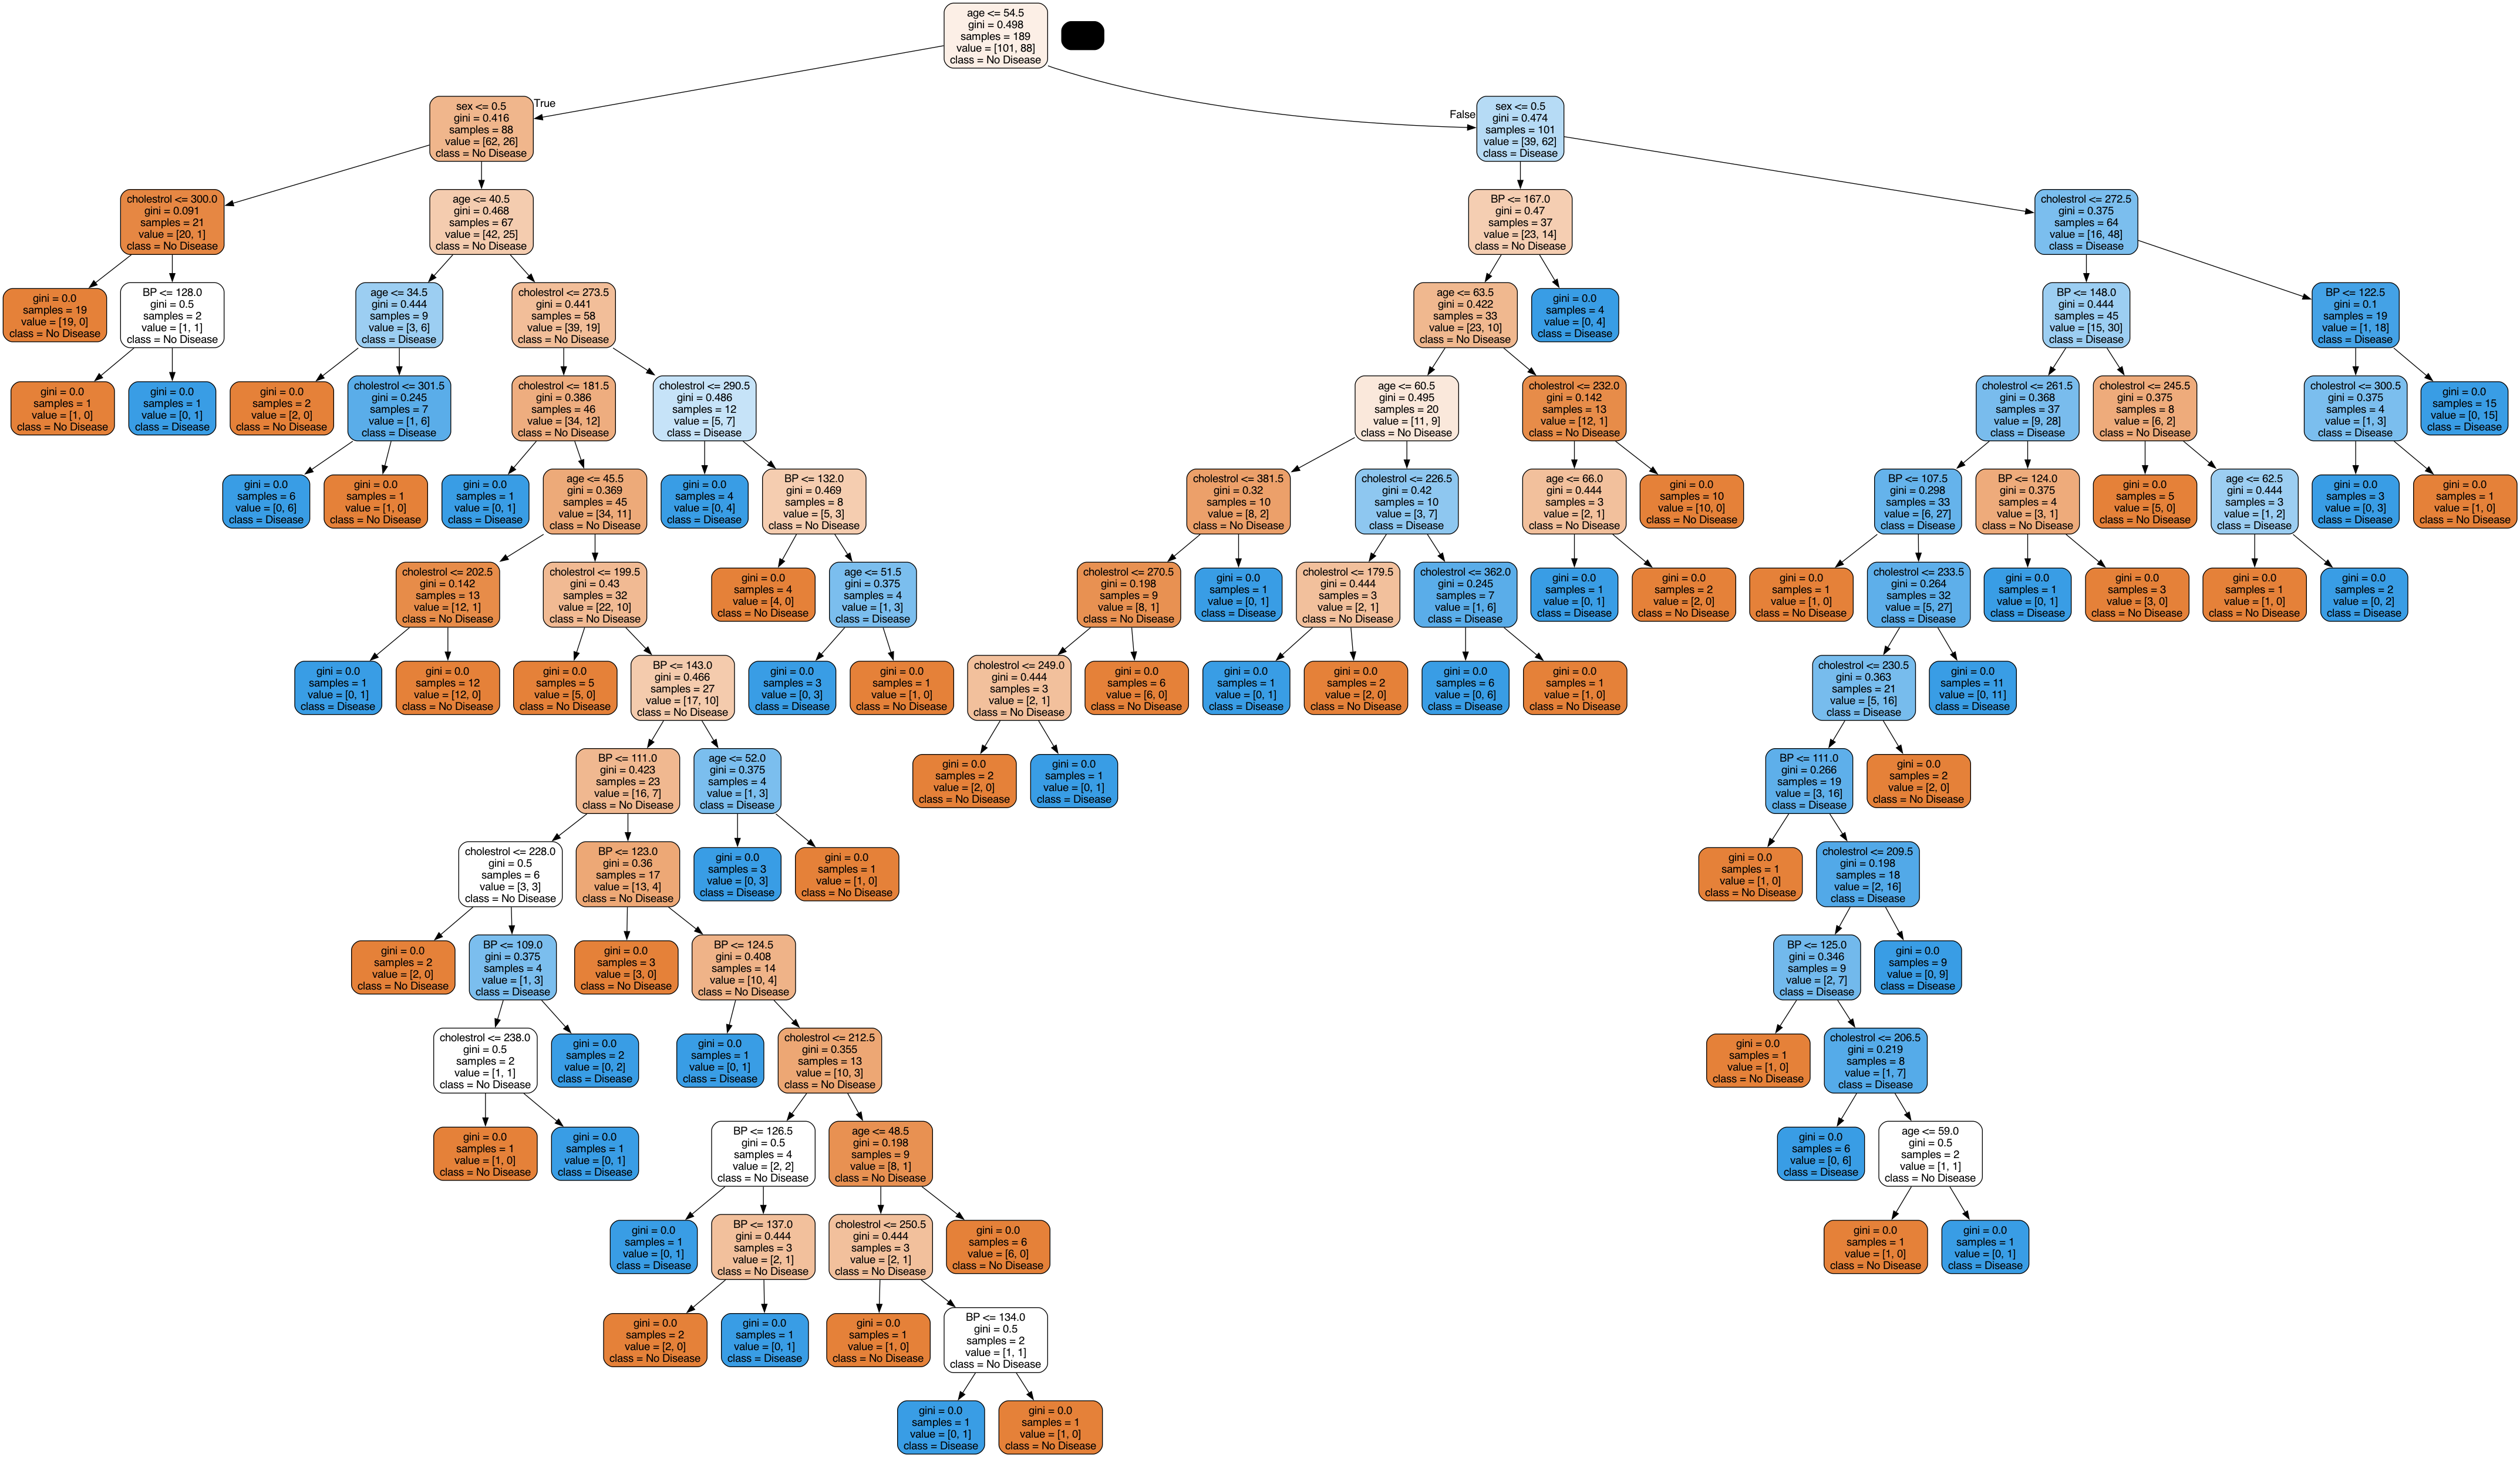

In [22]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

Controlling the depth of the tree

In [23]:
dt_depth = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [24]:
evaulate_model(dt_depth)

Train set performance
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test set performance
0.6419753086419753
[[38 11]
 [18 14]]


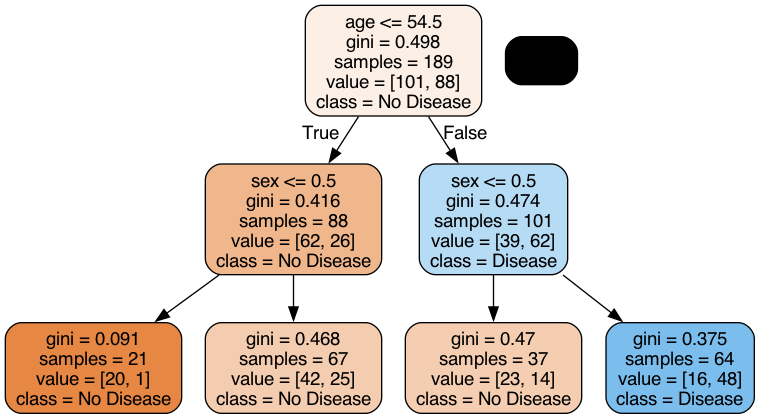

In [25]:
gph = get_dt_graph(dt_depth)
Image(gph.create_png())

Specifiying the minimum samples before the split(if a sample does not have the number of samples required then no more splitting)

In [26]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20, random_state=42)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

In [27]:
evaulate_model(dt_min_split)

Train set performance
0.8359788359788359
[[85 16]
 [15 73]]
--------------------------------------------------
Test set performance
0.6419753086419753
[[32 17]
 [12 20]]


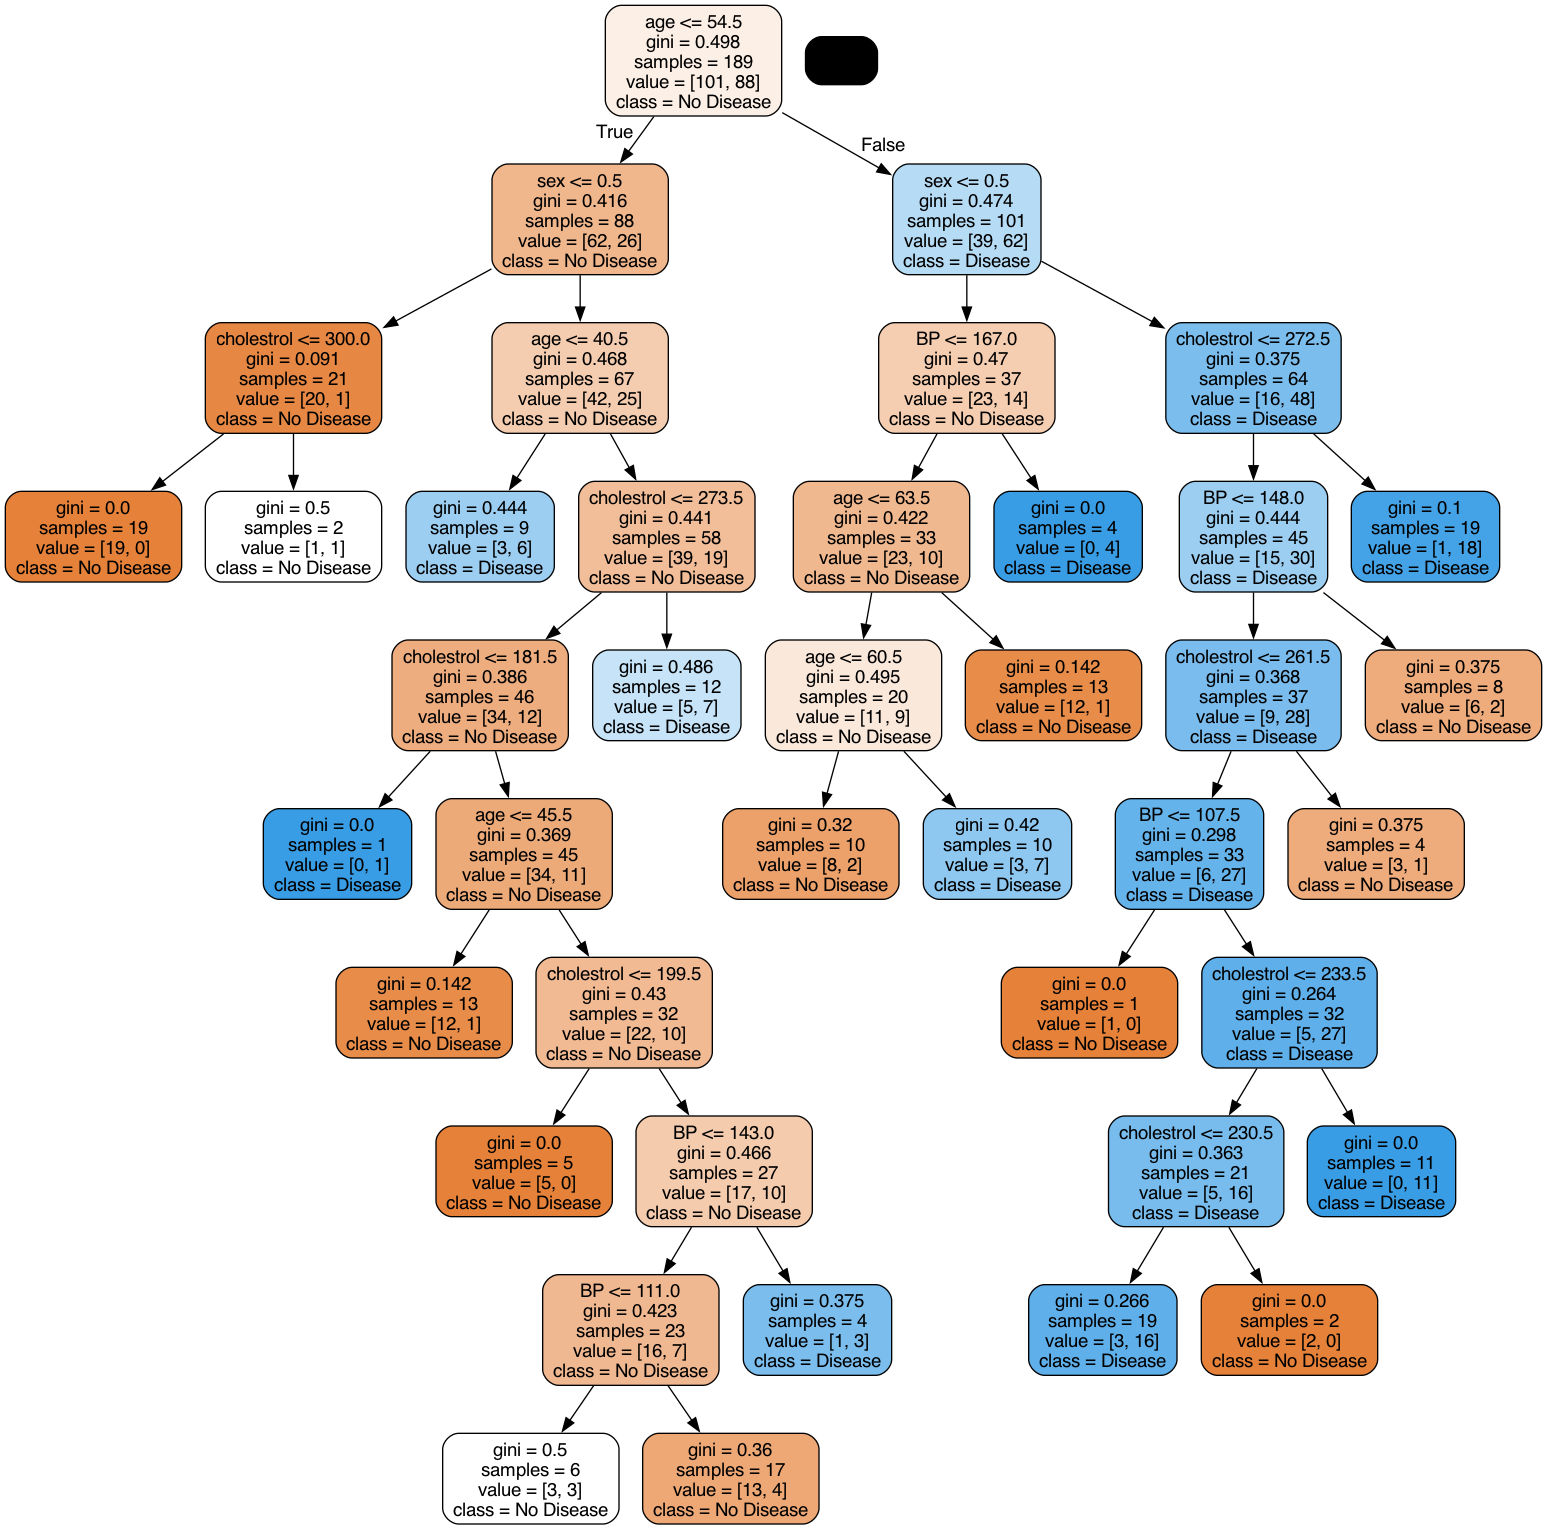

In [29]:
gph = get_dt_graph(dt_min_split)
Image(gph.create_png())

Specifying the minimum samples in leaf node

In [30]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

In [31]:
evaulate_model(dt_min_leaf)

Train set performance
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test set performance
0.6419753086419753
[[38 11]
 [18 14]]


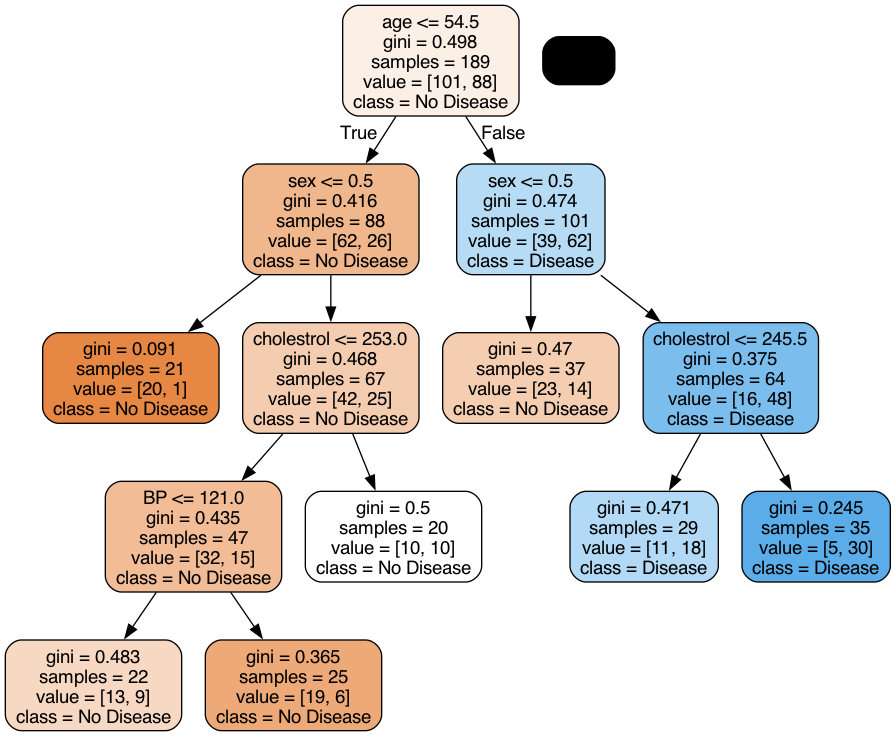

In [33]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

### Using entropy instead of Gini

In [34]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

In [35]:
evaulate_model(dt_min_leaf_entropy)

Train set performance
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test set performance
0.6419753086419753
[[38 11]
 [18 14]]


#### Hyper-paramter tuning using Grid Search CV

In [36]:
dt = DecisionTreeClassifier(random_state=42)

In [37]:
from sklearn.model_selection import GridSearchCV

In [39]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'criterion': ['gini', 'entropy']
}

In [40]:
grid_search = GridSearchCV(estimator=dt,
             param_grid=params,
             cv=4, # 4-fold validation, which means 1/4 of the data would be used for testing, splits into 75:25 ratio
             n_jobs = -1, verbose = 1,
             scoring = 'accuracy')

In [41]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 80.8 ms, sys: 80 ms, total: 161 ms
Wall time: 2.35 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

- 4 fold for each of 50 candidates -> 50 is the total params used (5X5X2)

In [43]:
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003068,0.000129,0.000928,0.000204,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,18
1,0.003047,0.000266,0.001345,0.000423,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,18
2,0.001539,0.000780,0.000654,0.000132,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,20
3,0.001263,0.000421,0.000467,0.000015,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,8
4,0.001326,0.000422,0.000695,0.000323,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,41


In [44]:
cv_df.shape

(50, 15)

In [45]:
cv_df.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
30,0.001063,0.000539,0.000761,0.000555,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,1
6,0.000851,0.000230,0.000416,0.000038,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.645833,0.744681,0.595745,0.680851,0.666777,0.054202,2
31,0.000611,0.000093,0.000370,0.000026,entropy,3,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.625000,0.744681,0.595745,0.680851,0.661569,0.056898,3
5,0.000800,0.000333,0.000514,0.000141,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.625000,0.744681,0.595745,0.659574,0.656250,0.055831,4
11,0.000730,0.000196,0.000388,0.000039,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.645833,0.723404,0.595745,0.659574,0.656139,0.045525,5


In [46]:
grid_search.best_score_

0.6669991134751774

In [47]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [48]:
dt_best = grid_search.best_estimator_
evaulate_model(dt_best)

Train set performance
0.7195767195767195
[[82 19]
 [34 54]]
--------------------------------------------------
Test set performance
0.6172839506172839
[[36 13]
 [18 14]]


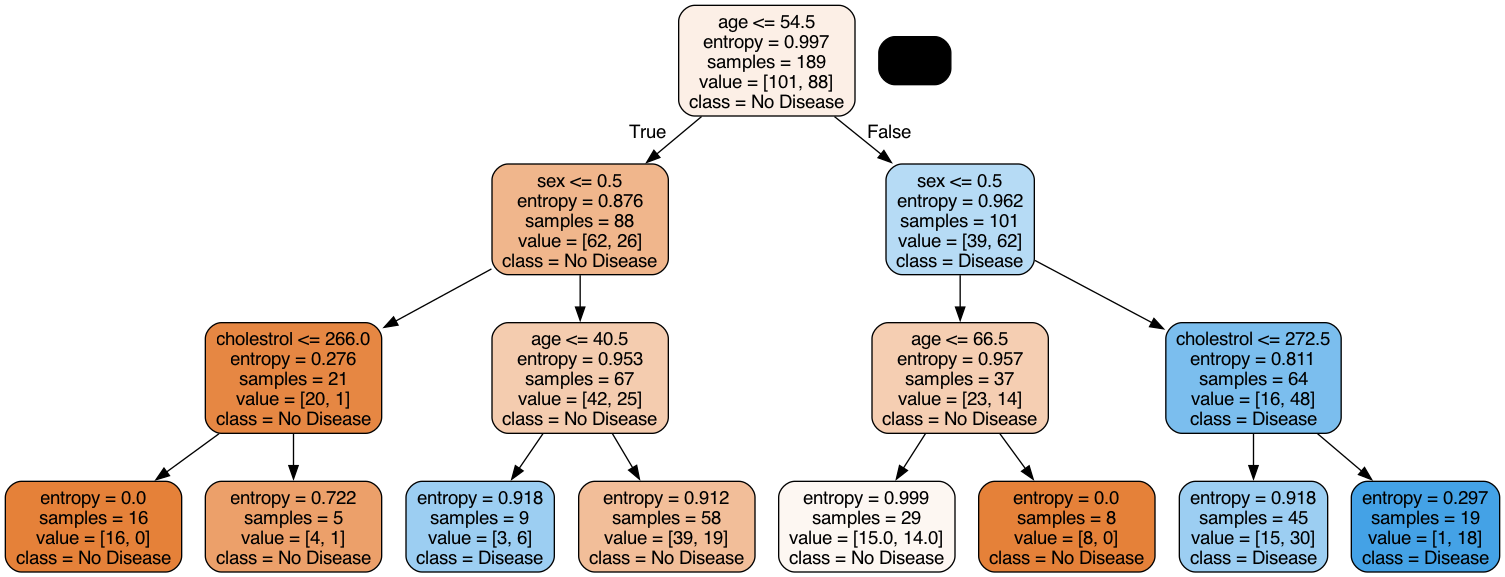

In [49]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())